In [3]:
import os 
import pandas as pd
import numpy as np
import h5py
import json
from numpy import nan
from datetime import datetime, timedelta, date
from fractions import Fraction
from time import mktime
import time
import requests
import os.path
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
import seaborn as sns

In [2]:
def load_from_checkpoint(checkpoint_name):
    if os.path.isfile(checkpoint_name):
        return pd.read_hdf(checkpoint_name,'table')

In [7]:
original_df = load_from_checkpoint('./checkpoints/data_3.h5')  

In [8]:
binary_df = load_from_checkpoint('./checkpoints/data_binary_encoded.h5')  

In [61]:
regression_df = load_from_checkpoint('./checkpoints/regression_data_encoded.h5') 

In [46]:
categorical_df = load_from_checkpoint('./checkpoints/data_categorical.h5')  

In [195]:
binary_df.columns

Index(['device_id_name', 'week', 'day', 'month', 'hour', 'minute', 'second',
       'sun', 'outside_temperature', 'event_Active Fan LevelHigh',
       'event_Active Fan LevelOff', 'event_Auto ModeDisabled',
       'event_Auto ModeEnabled', 'event_Cool Stage 1Active',
       'event_Cool Stage 1Inactive', 'event_DoorLockLock',
       'event_DoorLockUnlock', 'event_FanAuto', 'event_FanOn',
       'event_Floor WarmingHeat:False', 'event_Floor WarmingOff:False',
       'event_Floor WarmingOff:True', 'event_GraceOccupancyDetected',
       'event_Heat Stage 1Active', 'event_Heat Stage 1Inactive',
       'event_HoldOff', 'event_HoldOn', 'event_Humidifier OffActive',
       'event_Humidifier OffInactive', 'event_OccupancyDetected',
       'event_VacancyDetected'],
      dtype='object')

In [202]:
binary_df.dtypes

day                              int64
event_Active Fan LevelHigh       int64
event_Active Fan LevelOff        int64
event_Auto ModeDisabled          int64
event_Auto ModeEnabled           int64
event_Cool Stage 1Active         int64
event_Cool Stage 1Inactive       int64
event_DoorLockLock               int64
event_DoorLockUnlock             int64
event_FanAuto                    int64
event_FanOn                      int64
event_Floor WarmingHeat:False    int64
event_Floor WarmingOff:False     int64
event_Floor WarmingOff:True      int64
event_GraceOccupancyDetected     int64
event_Heat Stage 1Active         int64
event_Heat Stage 1Inactive       int64
event_HoldOff                    int64
event_HoldOn                     int64
event_Humidifier OffActive       int64
event_Humidifier OffInactive     int64
event_OccupancyDetected          int64
event_VacancyDetected            int64
hour                             int64
minute                           int64
month                    

In [203]:
binary_df.head()

,day,event_Active Fan LevelHigh,event_Active Fan LevelOff,event_Auto ModeDisabled,event_Auto ModeEnabled,event_Cool Stage 1Active,event_Cool Stage 1Inactive,event_DoorLockLock,event_DoorLockUnlock,event_FanAuto,event_FanOn,event_Floor WarmingHeat:False,event_Floor WarmingOff:False,event_Floor WarmingOff:True,event_GraceOccupancyDetected,event_Heat Stage 1Active,event_Heat Stage 1Inactive,event_HoldOff,event_HoldOn,event_Humidifier OffActive,event_Humidifier OffInactive,event_OccupancyDetected,event_VacancyDetected,hour,minute,month,outside_temperature,second,sun,week
1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,5,1,32
3,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,5,1,32
4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,5,1,32
13,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,5,1,32
14,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,68,7,1,32


In [204]:
binary_df[binary_df == 0] = np.nan

In [181]:
original_col_df = binary_df[['week', 'day', 'month', 'hour',  'minute', 'second', 'sun', 'outside_temperature']].fillna(0)

In [182]:
binary_df = pd.concat([binary_df, original_col_df], axis=1)

### Let's take a closer look at locking or unlocking door events

In [96]:
other_columns = ['week', 'day', 'month', 'hour',  'minute', 'second', 'sun', 'outside_temperature']

In [97]:
door_columns = other_columns + ['event_DoorLockLock', 'event_DoorLockUnlock']
door_lock_df = binary_df[door_columns]

In [147]:
len(binary_df.month.unique())

10

In [146]:
len(binary_df.loc[binary_df.event_DoorLockLock == 1])

313

In [229]:
df_lock_count = door_lock_df[['event_DoorLockLock', 'hour']].groupby(['hour'], as_index=False).sum()
df_lock_count = df_lock_count.set_index('hour')

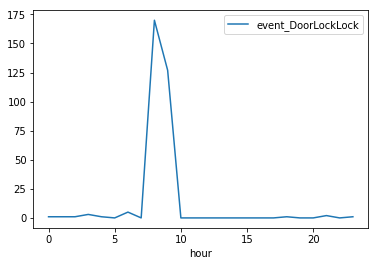

In [230]:
df_lock_count.plot()

In [231]:
df_unlock_count = door_lock_df[['event_DoorLockUnlock', 'hour']].groupby(['hour'], as_index=False).sum()
df_unlock_count = df_unlock_count.set_index('hour')

In [234]:
len(binary_df.loc[binary_df.event_DoorLockUnlock == 1])

24

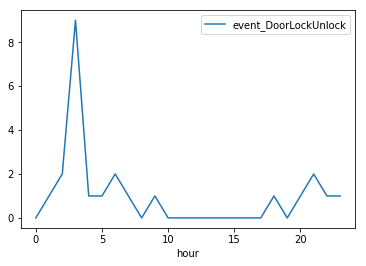

In [233]:
df_unlock_count.plot()

In [22]:
df_temperature_related = binary_df[['outside_temperature', 'event_Active Fan LevelHigh',
       'event_Active Fan LevelOff', 'event_Cool Stage 1Active',
       'event_Cool Stage 1Inactive','event_FanAuto', 'event_FanOn',
       'event_Floor WarmingHeat:False', 'event_Floor WarmingOff:False',
       'event_Floor WarmingOff:True',
       'event_Heat Stage 1Active', 'event_Heat Stage 1Inactive',
       'event_Humidifier OffActive',
       'event_Humidifier OffInactive']].groupby(['outside_temperature'], as_index=False).sum()
# df_vacancy_count = binary_df[['event_VacancyDetected', 'hour']].groupby(['hour'], as_index=False).sum()

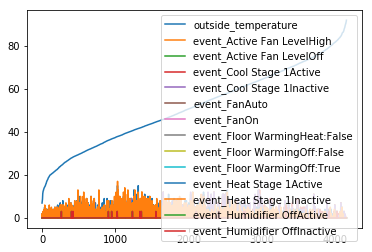

In [23]:
df_temperature_related.plot()

In [10]:
binary_hour_df = binary_df.copy().groupby('hour').sum()

### Normalize Values

In [5]:
regression_df = load_from_checkpoint('./checkpoints/regression_data_encoded.h5') 

In [6]:
regression_df['regression_value_type_Climate'] = regression_df['regression_value_type_Climate'].astype(int)

In [7]:
regression_df['regression_value_type_Shades'] = regression_df['regression_value_type_Shades'].astype(int)

In [8]:
regression_df['regression_value_type_Lights'] = regression_df['regression_value_type_Lights'].astype(int)

In [14]:
regression_df['lights_value'] = [0]*len(regression_df)
regression_df['lights_value'] = regression_df['lights_value'] + regression_df[regression_df['regression_value_type_Lights'] != 0].value

In [21]:
regression_df['shades_value'] = [0]*len(regression_df)
regression_df['shades_value'] = regression_df[regression_df['regression_value_type_Shades'] != 0].value

In [17]:
regression_df['climate_value'] = [0]*len(regression_df)
regression_df['climate_value'] += regression_df[regression_df['regression_value_type_Climate'] != 0].value

In [22]:
regression_df.head()

,device_id_name,value,week,day,month,hour,minute,second,sun,outside_temperature,regression_value_type_Climate,regression_value_type_Lights,regression_value_type_Shades,lights_value,climate_value,shades_value
13,118Sconces,19275.0,32,11,8,8,0,5,1,68.48,0,1,0,19275.0,NaN,NaN
14,122Chandelier,0.0,32,11,8,8,0,7,1,68.48,0,1,0,0.0,NaN,NaN
15,120Overhead,0.0,32,11,8,8,0,7,1,68.48,0,1,0,0.0,NaN,NaN
16,118Sconces,19275.0,32,11,8,8,0,7,1,68.48,0,1,0,19275.0,NaN,NaN
21,194Master Bed,71.0,32,11,8,8,6,13,1,68.48,1,0,0,NaN,71.0,NaN


In [24]:
regression_df = regression_df.fillna(0.0)

In [28]:
from sklearn import preprocessing
def normalize_col(data_frame, col):
    # normalize outside temperatures 
    vals = regression_df[[col]].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    col_scaled = min_max_scaler.fit_transform(vals)
    regression_df[col] = col_scaled
    return regression_df

In [34]:
# regression_df = normalize_col(regression_df, 'lights_value')
# regression_df = normalize_col(regression_df, 'climate_value')
# regression_df = normalize_col(regression_df, 'shades_value')
# regression_df = normalize_col(regression_df, 'outside_temperature')

In [40]:
regression_df.head()

,device_id_name,value,week,day,month,hour,minute,second,sun,outside_temperature,regression_value_type_Climate,regression_value_type_Lights,regression_value_type_Shades,lights_value,climate_value,shades_value
13,118Sconces,19275.0,32,11,8,8,0,5,1,0.724865,0,1,0,0.294118,0.000000,0.0
14,122Chandelier,0.0,32,11,8,8,0,7,1,0.724865,0,1,0,0.000000,0.000000,0.0
15,120Overhead,0.0,32,11,8,8,0,7,1,0.724865,0,1,0,0.000000,0.000000,0.0
16,118Sconces,19275.0,32,11,8,8,0,7,1,0.724865,0,1,0,0.294118,0.000000,0.0
21,194Master Bed,71.0,32,11,8,8,6,13,1,0.724865,1,0,0,0.000000,0.581967,0.0


In [42]:
regression_df = regression_df.drop('value', axis=1)

In [63]:
# original_df.loc[original_df['regression_value_type'] == 'Shades']